# Part B - Task2 
#### Student ID : R00182510

In [28]:

import tensorflow as tf
print(tf.__version__)

import numpy as np
import h5py
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


2.1.0


In [29]:
def loadDataH5():
        
    # Load teh input data
    with h5py.File('/home/jupyter/dataset/data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

In [30]:

def plotAccLoss(H, NUM_EPOCHS):
    # plot accuracy and loss values
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

## Exp 1 - VGG16 model

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                4369      
Total params: 16,816,465
Trainable params: 2,101,777
Non-trainable params: 14,714,688
_________________________________________________________________
None

 Phase A - Training Fully Connected Layers

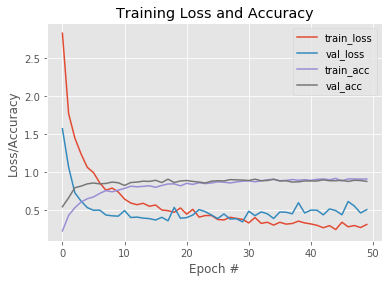


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples
Epoch 1/50
64/63 [==============================] - 10s 156ms/step - loss: 0.2611 - accuracy: 0.9098 - val_loss: 0.5460 - val_accuracy: 0.9059
Epoch 2/50
64/63 [==============================] - 9s 133ms/step - loss: 0.2115 - accuracy: 0.9392 - val_loss: 0.3937 - val_accuracy: 0.9029
Epoch 3/50
64/63 [==============================] - 9s 133ms/step - loss: 0.2183 - accuracy: 0.9324 - val_loss: 0.4347 - val_accuracy: 0.9147
Epoch 4/50
64/63 [==============================] - 9s 133ms/step - loss: 0.1579 - accuracy: 0.9451 - val_loss: 0.5346 - val_accuracy: 0.9088
Epoch 5/50
64/63 [==============================] - 9s 133ms/step - loss: 0.1667 - accuracy: 0.9520 - val_loss: 0.5423 - val_accuracy: 0.8971
Epoch 6/50
64/63 [==============================] - 9s 134ms/step - loss: 0.1266 - accuracy: 0.9559 - val_loss: 0.5851 - val_accuracy: 0

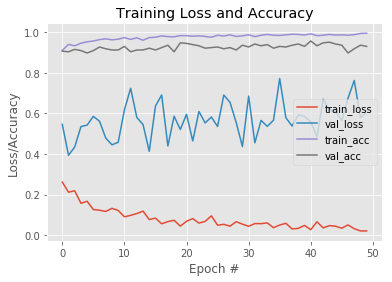

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd


def main():
    NUM_EPOCHS = 50
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    
    # setup the VGG16 model with trainable as False for all top layers
    vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    vggModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(vggModel)
    # include full connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))  
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
    # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # set the trainable as True for layers below block4_conv1
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    vggModel.trainable = True
    trainableFlag = False
    for layer in vggModel.layers:
        if layer.name == 'block4_conv1':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)

main()


## Exp 2 - Adding Regularization to Exp 1

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_26 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 17)                4369      
Total params: 16,816,465
Trainable params: 2,101,777
Non-trainable params: 14,714,688
_________________________________________________________________
None

 Phase A - Training Fully Connected Lay

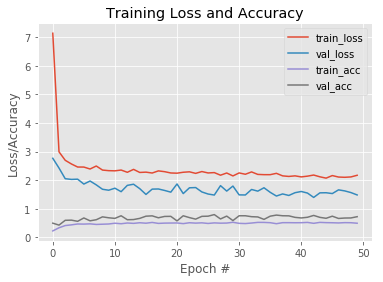


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples

Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-06.
Epoch 1/50
63/63 [============================>.] - ETA: 0s - loss: 1.6453 - accuracy: 0.6653
Epoch 00001: val_loss improved from inf to 1.08747, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 10s 157ms/step - loss: 1.6395 - accuracy: 0.6667 - val_loss: 1.0875 - val_accuracy: 0.8559

Epoch 00002: LearningRateScheduler setting learning rate to 9.990009737641111e-06.
Epoch 2/50
63/63 [============================>.] - ETA: 0s - loss: 1.4579 - accuracy: 0.7201
Epoch 00002: val_loss improved from 1.08747 to 0.99903, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 9s 137ms/step - loss: 1.4544 - accuracy: 0.7225 - val_loss: 0.9990 - val_accuracy: 0.8588

Epoch 00003: Lear

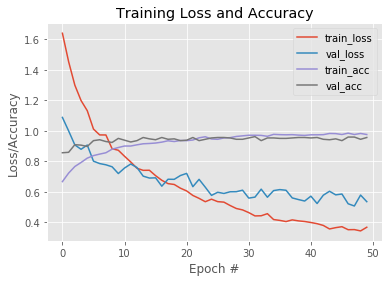

340/340 [==============================] - 1s 3ms/sample - loss: 0.5068 - accuracy: 0.9588

Best Validation loss and Accuracy:  [0.5068482959971709, 0.9588235]


In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd

# function to modify learning rate after every epoch for learning rate scheduler
# code referred from https://theailearner.com/2019/07/23/keras-callbacks-learningratescheduler/
def time_decay(epoch, initial_lrate):
    decay_rate = 0.001
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate

def main():
    NUM_EPOCHS = 50
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    
    # setup the VGG16 model with trainable as False for all top layers
    vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    vggModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(vggModel)
    # include fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(0.05)))  
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)
    
    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
     # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # introduce the callbacks for checkpointing and learning rate scheduler
    fname= "checkpointed_model_PartBTask2.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
    
    from keras.callbacks import LearningRateScheduler
    lrate = LearningRateScheduler(time_decay,verbose=1)
    
    # set the trainable flag as True for layers below block4_conv1
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    vggModel.trainable = True
    trainableFlag = False
    for layer in vggModel.layers:
        if layer.name == 'block4_conv1':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY),
                callbacks=[checkpoint, lrate])

    plotAccLoss(H, NUM_EPOCHS)
    
    # load the checkpointed model weights
    model.load_weights("checkpointed_model_PartBTask2.hdf5")
    
    # evaluate the model
    results = model.evaluate(testX, testY)
    print("\nBest Validation loss and Accuracy: ",results) 

main()


## Exp 3 - VGG16 with additional ReLu layer 

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________

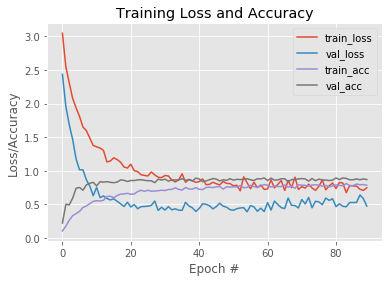


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples

Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-06.
Epoch 1/90
63/63 [============================>.] - ETA: 0s - loss: 0.7989 - accuracy: 0.7859
Epoch 00001: val_loss improved from inf to 0.43085, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 10s 154ms/step - loss: 0.7923 - accuracy: 0.7873 - val_loss: 0.4309 - val_accuracy: 0.9176

Epoch 00002: LearningRateScheduler setting learning rate to 9.990009737641111e-06.
Epoch 2/90
63/63 [============================>.] - ETA: 0s - loss: 0.6583 - accuracy: 0.8058
Epoch 00002: val_loss did not improve from 0.43085
64/63 [==============================] - 8s 132ms/step - loss: 0.6750 - accuracy: 0.8020 - val_loss: 0.4614 - val_accuracy: 0.8794

Epoch 00003: LearningRateScheduler setting learning rate to 9.97006971813

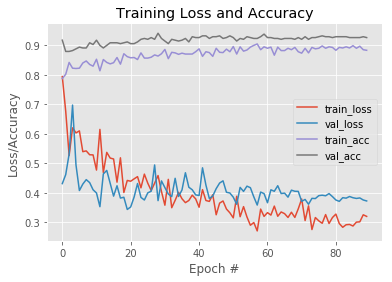

340/340 [==============================] - 1s 3ms/sample - loss: 0.3431 - accuracy: 0.9118

Best Validation loss and Accuracy:  [0.34314760951434864, 0.9117647]


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd

# function to modify learning rate after every epoch for learning rate scheduler
# code referred from https://theailearner.com/2019/07/23/keras-callbacks-learningratescheduler/
def time_decay(epoch, initial_lrate):
    decay_rate = 0.001
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate

def main():
    NUM_EPOCHS = 90
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    
    # setup the VGG16 model with trainable as False for all top layers
    vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    vggModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(vggModel)
    # include fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))  
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
    # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # introduce the callbacks for checkpointing and learning rate scheduler
    fname= "checkpointed_model_PartBTask2.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
    
    from keras.callbacks import LearningRateScheduler
    lrate = LearningRateScheduler(time_decay,verbose=1)
    
    # set the trainable flag as True for layers below block4_conv1
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    vggModel.trainable = True
    trainableFlag = False
    for layer in vggModel.layers:
        if layer.name == 'block4_conv1':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY),
                callbacks=[checkpoint, lrate])

    plotAccLoss(H, NUM_EPOCHS)
    # load the checkpointed model weights
    model.load_weights("checkpointed_model_PartBTask2.hdf5")
    # evaluate the model
    results = model.evaluate(testX, testY)
    print("\nBest Validation loss and Accuracy: ",results) 

main()


## Exp 4 - VGG16 with modified unfreezed pre-trained layers

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________

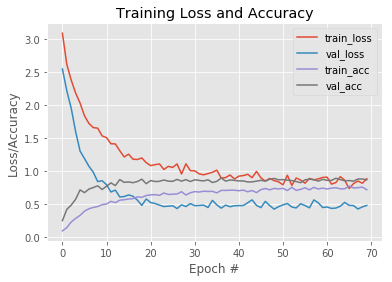


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples

Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-06.
Epoch 1/70
63/63 [============================>.] - ETA: 0s - loss: 0.6867 - accuracy: 0.7789
Epoch 00001: val_loss improved from inf to 0.45578, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 9s 138ms/step - loss: 0.6885 - accuracy: 0.7794 - val_loss: 0.4558 - val_accuracy: 0.8853

Epoch 00002: LearningRateScheduler setting learning rate to 9.990009737641111e-06.
Epoch 2/70
63/63 [============================>.] - ETA: 0s - loss: 0.6485 - accuracy: 0.7928
Epoch 00002: val_loss did not improve from 0.45578
64/63 [==============================] - 8s 119ms/step - loss: 0.6434 - accuracy: 0.7941 - val_loss: 0.4560 - val_accuracy: 0.8706

Epoch 00003: LearningRateScheduler setting learning rate to 9.970069718138

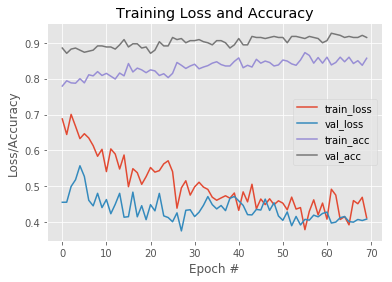

340/340 [==============================] - 1s 3ms/sample - loss: 0.3760 - accuracy: 0.9118

Best Validation loss and Accuracy:  [0.37601236140026767, 0.9117647]


In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd

# function to modify learning rate after every epoch for learning rate scheduler
# code referred from https://theailearner.com/2019/07/23/keras-callbacks-learningratescheduler/
def time_decay(epoch, initial_lrate):
    decay_rate = 0.001
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate

def main():
    NUM_EPOCHS = 70
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    
    # setup the VGG16 model with trainable as False for all top layers
    vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    vggModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(vggModel)
    model.add(tf.keras.layers.Flatten())
    # include fully connected layers
    model.add(tf.keras.layers.Dense(256, activation='relu'))  
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
    # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # introduce the callbacks for checkpointing and learning rate scheduler
    fname= "checkpointed_model_PartBTask2.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
    
    from keras.callbacks import LearningRateScheduler
    lrate = LearningRateScheduler(time_decay,verbose=1)
    
    # set the trainable flag as True for layers below block5_conv1
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    vggModel.trainable = True
    trainableFlag = False
    for layer in vggModel.layers:
        if layer.name == 'block5_conv1':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY),
                callbacks=[checkpoint, lrate])

    plotAccLoss(H, NUM_EPOCHS)
    # load the checkpointed model weights
    model.load_weights("checkpointed_model_PartBTask2.hdf5")
    # evaluate the model
    results = model.evaluate(testX, testY)
    print("\nBest Validation loss and Accuracy: ",results) 

main()


## Exp 5 - MobileNet model

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_8 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 17)                4369      
Total params: 7,427,793
Trainable params: 4,198,929
Non-trainable params: 3,228,864
_________________________________________________________________
None

 Phase A - Training Fully Connected Layers

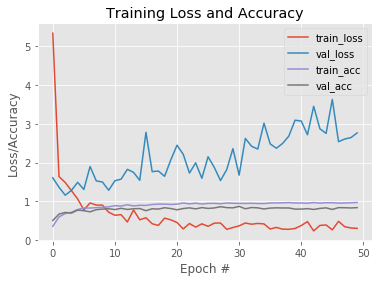


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples
Epoch 1/50
64/63 [==============================] - 8s 125ms/step - loss: 0.3197 - accuracy: 0.9647 - val_loss: 2.2276 - val_accuracy: 0.8529
Epoch 2/50
64/63 [==============================] - 6s 86ms/step - loss: 0.2813 - accuracy: 0.9647 - val_loss: 2.1012 - val_accuracy: 0.8559
Epoch 3/50
64/63 [==============================] - 6s 89ms/step - loss: 0.2749 - accuracy: 0.9657 - val_loss: 1.9842 - val_accuracy: 0.8618
Epoch 4/50
64/63 [==============================] - 6s 88ms/step - loss: 0.2515 - accuracy: 0.9735 - val_loss: 1.9977 - val_accuracy: 0.8647
Epoch 5/50
64/63 [==============================] - 6s 87ms/step - loss: 0.2503 - accuracy: 0.9676 - val_loss: 2.0297 - val_accuracy: 0.8647
Epoch 6/50
64/63 [==============================] - 5s 86ms/step - loss: 0.1956 - accuracy: 0.9735 - val_loss: 2.0074 - val_accuracy: 0.8647


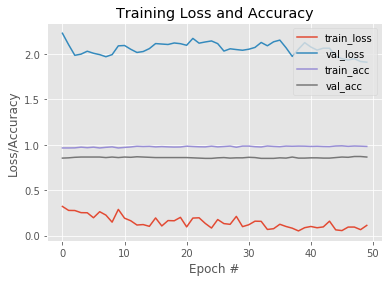

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd


def main():
    NUM_EPOCHS = 50
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    
    # setup the MobileNet model with trainable as False for all top layers
    MobileNetModel = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    MobileNetModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(MobileNetModel)
    # include fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu')) 
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
    # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # set the trainable flag as True for layers below conv_dw_12
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    MobileNetModel.trainable = True
    trainableFlag = False
    for layer in MobileNetModel.layers:
        if layer.name == 'conv_dw_12':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)

main()


## Exp 6 – Adding Regularization to Exp 5

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_14 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 17)                4369      
Total params: 7,427,793
Trainable params: 4,198,929
Non-trainable params: 3,228,864
_________________________________________________________________
None

 Phase A - Training Fully Connected Layer

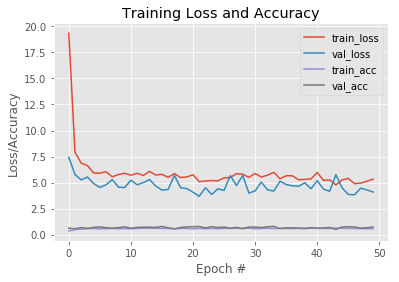


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples

Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-06.
Epoch 1/50
63/63 [============================>.] - ETA: 0s - loss: 4.1289 - accuracy: 0.6723
Epoch 00001: val_loss improved from inf to 3.47708, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 8s 127ms/step - loss: 4.1166 - accuracy: 0.6745 - val_loss: 3.4771 - val_accuracy: 0.7794

Epoch 00002: LearningRateScheduler setting learning rate to 9.990009737641111e-06.
Epoch 2/50
63/63 [============================>.] - ETA: 0s - loss: 3.5759 - accuracy: 0.7371
Epoch 00002: val_loss improved from 3.47708 to 3.23047, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 6s 91ms/step - loss: 3.5701 - accuracy: 0.7373 - val_loss: 3.2305 - val_accuracy: 0.7971

Epoch 00003: Learni

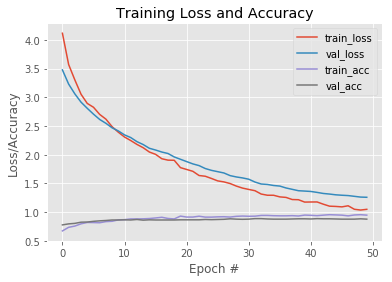

340/340 [==============================] - 0s 939us/sample - loss: 1.2599 - accuracy: 0.8794

Best Validation loss and Accuracy:  [1.259915688458611, 0.87941176]


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd

# function to modify learning rate after every epoch for learning rate scheduler
# code referred from https://theailearner.com/2019/07/23/keras-callbacks-learningratescheduler/
def time_decay(epoch, initial_lrate):
    decay_rate = 0.001
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate


def main():
    NUM_EPOCHS = 50
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    # setup the MobileNet model with trainable as False for all top layers
    MobileNetModel = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    MobileNetModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(MobileNetModel)
    model.add(tf.keras.layers.Flatten())
    # include fully connected layers
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(0.07))) 
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
    # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # introduce the callbacks for checkpointing and learning rate scheduler
    fname= "checkpointed_model_PartBTask2.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

    from keras.callbacks import LearningRateScheduler
    lrate = LearningRateScheduler(time_decay,verbose=1)
    
    # set the trainable flag as True for layers below conv_dw_12
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    MobileNetModel.trainable = True
    trainableFlag = False
    for layer in MobileNetModel.layers:
        if layer.name == 'conv_dw_12':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY),
                callbacks=[checkpoint, lrate])

    plotAccLoss(H, NUM_EPOCHS)
    
    # load the checkpointed model weights
    model.load_weights("checkpointed_model_PartBTask2.hdf5")
    # evaluate the model
    results = model.evaluate(testX, testY)
    print("\nBest Validation loss and Accuracy: ",results) 

main()


## Exp 7 - MobileNet with additional ReLu layer

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_18 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________

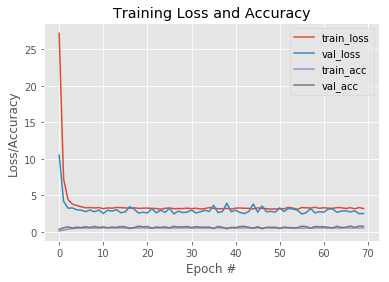


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples

Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-06.
Epoch 1/70
63/63 [============================>.] - ETA: 0s - loss: 2.5330 - accuracy: 0.6643
Epoch 00001: val_loss improved from inf to 2.20990, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 8s 131ms/step - loss: 2.5267 - accuracy: 0.6676 - val_loss: 2.2099 - val_accuracy: 0.8353

Epoch 00002: LearningRateScheduler setting learning rate to 9.990009737641111e-06.
Epoch 2/70
63/63 [============================>.] - ETA: 0s - loss: 2.4124 - accuracy: 0.6773
Epoch 00002: val_loss improved from 2.20990 to 2.05704, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 6s 93ms/step - loss: 2.4170 - accuracy: 0.6755 - val_loss: 2.0570 - val_accuracy: 0.8500

Epoch 00003: Learni

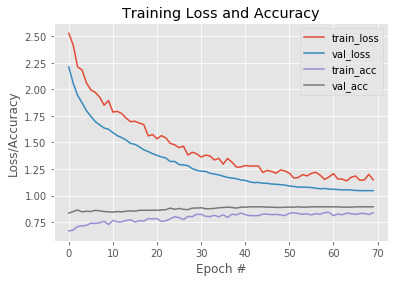

340/340 [==============================] - 0s 987us/sample - loss: 1.0461 - accuracy: 0.8941

Best Validation loss and Accuracy:  [1.046117530149572, 0.89411765]


In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd

# function to modify learning rate after every epoch for learning rate scheduler
# code referred from https://theailearner.com/2019/07/23/keras-callbacks-learningratescheduler/
def time_decay(epoch, initial_lrate):
    decay_rate = 0.001
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate


def main():
    NUM_EPOCHS = 70
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    # setup the MobileNet model with trainable as False for all top layers
    MobileNetModel = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    MobileNetModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(MobileNetModel)
    model.add(tf.keras.layers.Flatten())
    # include fully connected layers
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(0.07))) 
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(0.07))) 
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
    # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # introduce the callbacks for checkpointing and learning rate scheduler
    fname= "checkpointed_model_PartBTask2.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

    from keras.callbacks import LearningRateScheduler
    lrate = LearningRateScheduler(time_decay,verbose=1)
    
    # set the trainable flag as True for layers below conv_dw_12
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    MobileNetModel.trainable = True
    trainableFlag = False
    for layer in MobileNetModel.layers:
        if layer.name == 'conv_dw_12':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY),
                callbacks=[checkpoint, lrate])

    plotAccLoss(H, NUM_EPOCHS)
    
    # load the checkpointed model weights
    model.load_weights("checkpointed_model_PartBTask2.hdf5")
    # evaluate the model
    results = model.evaluate(testX, testY)
    print("\nBest Validation loss and Accuracy: ",results) 

main()


## Exp 8 - MobileNet with modified unfreezed pre-trained layers

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_17 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________

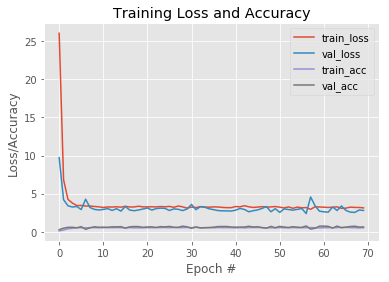


 Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers 

  ...
    to  
  ['...']
Train for 63.75 steps, validate on 340 samples

Epoch 00001: LearningRateScheduler setting learning rate to 9.999999747378752e-06.
Epoch 1/70
63/63 [============================>.] - ETA: 0s - loss: 2.7316 - accuracy: 0.6185
Epoch 00001: val_loss improved from inf to 2.29854, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 9s 144ms/step - loss: 2.7275 - accuracy: 0.6176 - val_loss: 2.2985 - val_accuracy: 0.7471

Epoch 00002: LearningRateScheduler setting learning rate to 9.990009737641111e-06.
Epoch 2/70
63/63 [============================>.] - ETA: 0s - loss: 2.4544 - accuracy: 0.6394
Epoch 00002: val_loss improved from 2.29854 to 2.09548, saving model to checkpointed_model_PartBTask2.hdf5
64/63 [==============================] - 6s 92ms/step - loss: 2.4505 - accuracy: 0.6422 - val_loss: 2.0955 - val_accuracy: 0.8000

Epoch 00003: Learni

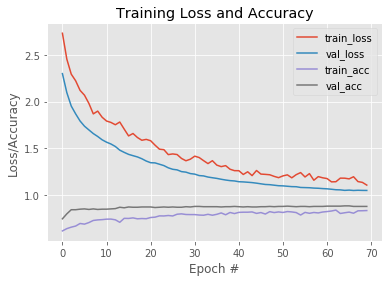

340/340 [==============================] - 0s 960us/sample - loss: 1.0498 - accuracy: 0.8794

Best Validation loss and Accuracy:  [1.049803395832286, 0.87941176]


In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from glob import glob
import pandas as pd

# function to modify learning rate after every epoch for learning rate scheduler
# code referred from https://theailearner.com/2019/07/23/keras-callbacks-learningratescheduler/
def time_decay(epoch, initial_lrate):
    decay_rate = 0.001
    new_lrate = initial_lrate/(1+decay_rate*epoch)
    return new_lrate


def main():
    NUM_EPOCHS = 70
    # Load input data
    trainX, trainY, testX, testY = loadDataH5()
    width = trainX.shape[1]
    height = trainX.shape[2]
    depth = trainX.shape[3]
    batchSize = 16
    # setup the MobileNet model with trainable as False for all top layers
    MobileNetModel = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    MobileNetModel.trainable = False
    model = tf.keras.models.Sequential()
    model.add(MobileNetModel)
    # include fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(0.07))) 
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(0.07))) 
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    print (model.summary())
    
    # Introduce data augmentation with ImageDataGenerator
    trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
      shear_range=0.2,
      zoom_range=0.2,
      rotation_range=30,
      horizontal_flip=True)
    
    train_generator = trainDataGenerator.flow(trainX, trainY, batch_size=16)

    print ("\n Phase A - Training Fully Connected Layers\n")
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])
    # train the Phase A model
    H =model.fit(train_generator, 
           epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY))

    plotAccLoss(H, NUM_EPOCHS)
    
    # introduce the callbacks for checkpointing and learning rate scheduler
    fname= "checkpointed_model_PartBTask2.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

    from keras.callbacks import LearningRateScheduler
    lrate = LearningRateScheduler(time_decay,verbose=1)
    
    # set the trainable flag as True for layers below conv_dw_11
    print ("\n Phase B  - Fine Tune Fully Connected Layer and Selected Convolutional Layers \n")
    MobileNetModel.trainable = True
    trainableFlag = False
    for layer in MobileNetModel.layers:
        if layer.name == 'conv_dw_11':
            trainableFlag = True
        layer.trainable = trainableFlag
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                metrics=['accuracy'])
    # re-train the model - phase B
    H =model.fit(train_generator, epochs=NUM_EPOCHS, steps_per_epoch=len(trainX)/ batchSize, validation_data=(testX, testY),
                callbacks=[checkpoint, lrate])

    plotAccLoss(H, NUM_EPOCHS)
    # load the checkpointed model weights
    model.load_weights("checkpointed_model_PartBTask2.hdf5")
    # evaluate the model
    results = model.evaluate(testX, testY)
    print("\nBest Validation loss and Accuracy: ",results) 

main()
